In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import os
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# https://medium.com/@sedefftaskin92/customer-segmentation-based-on-rfm-analysis-with-an-example-ed65c73274d

In [4]:
df = pd.read_csv('Online_Retail.csv', index_col=[0])
print(df.shape)
df.head(10)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## Check and Clean Missing Data

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df = df.dropna(subset=['CustomerID'])

In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Check for duplicated data

In [8]:
df.duplicated().sum()

5225

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [13]:
df.shape

(392692, 8)

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


## EDA

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
for i in df.columns:
    print(i, df[i].nunique())
# df.loc[df['Description'].str.contains('LANTERN')==True].shape

InvoiceNo 18532
StockCode 3665
Description 3877
Quantity 301
InvoiceDate 17282
UnitPrice 440
CustomerID 4338
Country 37


## Cohort analysis

In [18]:
print('Min Invoice Date:', pd.to_datetime(df.InvoiceDate.min()), 'max Invoice Date:', df.InvoiceDate.max())

Min Invoice Date: 2010-12-01 08:26:00 max Invoice Date: 2011-12-09 12:50:00


In [19]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [20]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010


In [21]:
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')
df['CohortYear'] = df.groupby('CustomerID')['InvoiceYear'].transform('min')
df['CohortIndex'] = (df['InvoiceYear'] - df['CohortYear']) * 12 + (df['InvoiceMonth'] - df['CohortMonth']) + 1 

df.sort_values('CohortIndex')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,CohortMonth,CohortYear,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,12,2010,1
131513,547568,21210,SET OF 72 RETROSPOT PAPER DOILIES,12,2011-03-24 09:50:00,1.45,13341.0,United Kingdom,3,2011,3,2011,1
131512,547568,21035,SET/2 RED RETROSPOT TEA TOWELS,6,2011-03-24 09:50:00,3.25,13341.0,United Kingdom,3,2011,3,2011,1
131511,547568,21155,RED RETROSPOT PEG BAG,6,2011-03-24 09:50:00,2.55,13341.0,United Kingdom,3,2011,3,2011,1
131510,547568,21843,RED RETROSPOT CAKE STAND,1,2011-03-24 09:50:00,10.95,13341.0,United Kingdom,3,2011,3,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517297,580049,21084,SET/6 COLLAGE PAPER CUPS,24,2011-12-01 12:54:00,0.19,13599.0,United Kingdom,12,2011,1,2010,24
517298,580049,21090,SET/6 COLLAGE PAPER PLATES,12,2011-12-01 12:54:00,0.39,13599.0,United Kingdom,12,2011,1,2010,24
517299,580049,22396,MAGNETS PACK OF 4 RETRO PHOTO,12,2011-12-01 12:54:00,0.39,13599.0,United Kingdom,12,2011,1,2010,24
517287,580048,23344,JUMBO BAG 50'S CHRISTMAS,1,2011-12-01 12:53:00,2.08,12748.0,United Kingdom,12,2011,1,2010,24


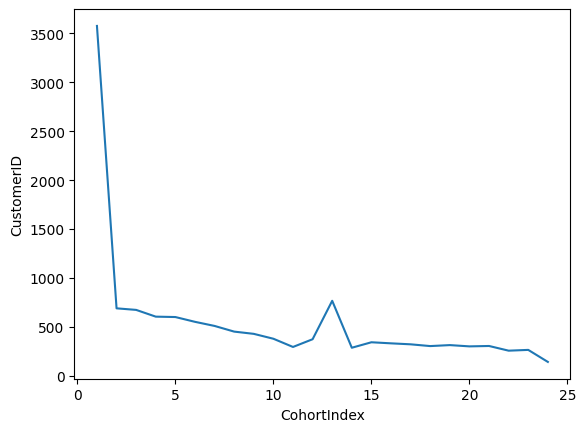

In [22]:
# Count monthly active customers from each cohort
cohort_data = df.groupby(['CohortIndex'])['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data.head(15)
sns.lineplot(x = cohort_data['CohortIndex'],  y = cohort_data['CustomerID']);

In [23]:
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts
mitosheet.sheet(cohort_counts, analysis_to_replay="id-qvdjlqhvnn")

## RFM - Recency, Frequency and Monetary 

- **Recency** is about when was the last order of a customer. It means the number of days since a customer made the last purchase. 

- **Frequency** is about the number of purchase in a given period. It could be 3 months, 6 months or 1 year. So we can understand this value as for how often or how many a customer used the product of a company. The bigger the value is, the more engaged the customers are. 

- **Monetary** is the total amount of money a customer spent in that given period. Therefore big spenders will be differentiated with other customers such as MVP or VIP.

**Process of calculating percentiles:**

1. Sort customers based on specific metric
2. Break customers into a pre-defined number of groups of equal size
3. Assign a label to each group

In [24]:
df['TotalSum'] = df['UnitPrice'] * df['Quantity']
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,CohortMonth,CohortYear,CohortIndex,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,12,2010,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,12,2010,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,12,2010,1,22.00


In [25]:
max_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
max_date

Timestamp('2011-12-10 12:50:00')

In [26]:
# Calculate RFM metrics
rfm = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (max_date - x.max()).days,
                                      'InvoiceNo': 'count',
                                      'TotalSum': 'sum'})

rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalSum':'Monetary'} ,inplace= True)

rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [27]:
# Calculate RFM metrics - alternative, shorter solution
rfm = df.groupby(['CustomerID']).agg(Recency = ('InvoiceDate', lambda x : (max_date - x.max()).days),
                                     Frequency = ('InvoiceNo', 'count'),
                                     Monetary = ('TotalSum', 'sum'))

rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [28]:
#Building RFM segments
r_labels = range(5,0,-1) # the lower recency, the better
f_labels = range(1,6) # the higher frequency, the better
m_labels = range(1,6) # the higher monetary, the better

r_quartiles = pd.qcut(rfm['Recency'], q=5, labels = r_labels).astype(int)
f_quartiles = pd.qcut(rfm['Frequency'],q=5, labels = f_labels).astype(int)
m_quartiles = pd.qcut(rfm['Monetary'],q=5,labels = m_labels).astype(int)
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

# Build RFM Segment and RFM Score
rfm["RF_Segment"] = rfm["R"].astype('str') + rfm["F"].astype('str')
rfm["RFM_Segment"] = rfm["R"].astype('str') + rfm["F"].astype('str') + rfm["M"].astype('str')
rfm['Score'] = rfm[['R','F','M']].sum(axis=1).astype('int')

rfm.head()

,Recency,Frequency,Monetary,R,F,M,RF_Segment,RFM_Segment,Score
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,11,115,7
12347.0,2,182,4310.00,5,5,5,55,555,15
12348.0,75,31,1797.24,2,3,4,23,234,9
12349.0,19,73,1757.55,4,4,4,44,444,12
12350.0,310,17,334.40,1,2,2,12,122,5


In [29]:
rfm.groupby(['RF_Segment']).size().sort_values(ascending=False)
# rfm.groupby(['RFM_Segment']).size().sort_values(ascending=False)

RF_Segment
55    399
11    383
12    264
44    248
45    246
21    222
23    206
54    205
33    201
22    200
34    192
32    177
43    170
24    155
31    150
35    138
53    136
13    134
42    125
41    115
52     71
14     65
25     60
51     57
15     19
dtype: int64

In [30]:
rfm.groupby('Score').agg({'Recency': 'mean',
                              'Frequency': 'mean',
                              'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary      
         mean      mean     mean count
Score                                 
3       278.6       7.0    138.6   271
4       203.4      11.2    199.6   260
5       182.6      16.3    295.5   368
6       126.1      19.8    370.4   385
7       102.7      26.2    901.2   383
8        86.5      35.9    627.2   365
9        70.6      46.4    863.5   359
10       59.1      61.9   1118.0   350
11       45.2      80.4   1947.7   336
12       34.3     108.2   1786.4   335
13       23.2     140.8   3100.1   314
14       15.5     230.4   4820.6   306
15        5.3     440.7  11665.5   306

In [31]:
rf_seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

# https://documentation.bloomreach.com/engagement/docs/rfm-segmentation
rfm_seg_map = {
    r'111|112|121|131|141|151': 'Lost Customers',
    r'111|112|121|131|141|151': 'Losing But Engaged',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'155|154|144|214|215|115|114|113': 'Can\'t Loose',
    r'331|321|312|221|213|231|241|251': 'About to Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'543|444|435|355|354|345|344|335': 'Loyal Customers',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalists',
    r'555|554|544|545|454|455|445': 'Champions'
}

score_seg_map = {'Dead':0, 'Green':1, 'Bronze':2, 'Silver':3, 'Gold':4, 'Platinum':5}

In [32]:
rfm['RF_Seg'] = rfm['RF_Segment'].replace(rf_seg_map, regex=True)
rfm['RFM_Seg'] = rfm['RFM_Segment'].replace(rfm_seg_map, regex=True)
rfm

,Recency,Frequency,Monetary,R,F,M,RF_Segment,RFM_Segment,Score,RF_Seg,RFM_Seg
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,11,115,7,Hibernating,Can't Loose
12347.0,2,182,4310.00,5,5,5,55,555,15,Champions,Champions
12348.0,75,31,1797.24,2,3,4,23,234,9,At Risk,At Risk
12349.0,19,73,1757.55,4,4,4,44,444,12,Loyal Customers,Loyal Customers
12350.0,310,17,334.40,1,2,2,12,122,5,Hibernating,Hibernating
...,...,...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,11,111,3,Hibernating,Losing But Engaged
18281.0,181,7,80.82,1,1,1,11,111,3,Hibernating,Losing But Engaged
18282.0,8,12,178.05,5,1,1,51,511,7,New Customers,New Customers


In [33]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      4338 non-null   int64  
 1   Frequency    4338 non-null   int64  
 2   Monetary     4338 non-null   float64
 3   R            4338 non-null   int32  
 4   F            4338 non-null   int32  
 5   M            4338 non-null   int32  
 6   RF_Segment   4338 non-null   object 
 7   RFM_Segment  4338 non-null   object 
 8   Score        4338 non-null   int32  
 9   RF_Seg       4338 non-null   object 
 10  RFM_Seg      4338 non-null   object 
dtypes: float64(1), int32(4), int64(2), object(4)
memory usage: 338.9+ KB


In [34]:
rfm['RFM_Score'] = 'Green'
rfm.loc[rfm['Score']>5,'RFM_Score'] = 'Bronze' 
rfm.loc[rfm['Score']>7,'RFM_Score'] = 'Silver' 
rfm.loc[rfm['Score']>9,'RFM_Score'] = 'Gold' 
rfm.loc[rfm['Score']>10,'RFM_Score'] = 'Platinum'
rfm.drop(columns=['Score'], errors = 'ignore', inplace=True)
        
rfm['Score'] = rfm['RFM_Score'].replace(score_seg_map, regex=True)

In [35]:
rfm

,Recency,Frequency,Monetary,R,F,M,RF_Segment,RFM_Segment,RF_Seg,RFM_Seg,RFM_Score,Score
CustomerID,,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,11,115,Hibernating,Can't Loose,Bronze,2
12347.0,2,182,4310.00,5,5,5,55,555,Champions,Champions,Platinum,5
12348.0,75,31,1797.24,2,3,4,23,234,At Risk,At Risk,Silver,3
12349.0,19,73,1757.55,4,4,4,44,444,Loyal Customers,Loyal Customers,Platinum,5
12350.0,310,17,334.40,1,2,2,12,122,Hibernating,Hibernating,Green,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,11,111,Hibernating,Losing But Engaged,Green,1
18281.0,181,7,80.82,1,1,1,11,111,Hibernating,Losing But Engaged,Green,1
18282.0,8,12,178.05,5,1,1,51,511,New Customers,New Customers,Bronze,2


## k-means clustering

**We must check these k-means assumptions before we implement our Kmeans Clustering Mode**
- Symmetric distribution of variables (not skewed)
- Variables with same average values
- Variables with same variance

In [36]:
rfm_rfm = rfm[['Recency','Frequency','Monetary']]
print(rfm_rfm.describe())

           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     92.536422    90.523744    2048.688081
std     100.014169   225.506968    8985.230220
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     306.482500
50%      51.000000    41.000000     668.570000
75%     142.000000    98.000000    1660.597500
max     374.000000  7676.000000  280206.020000


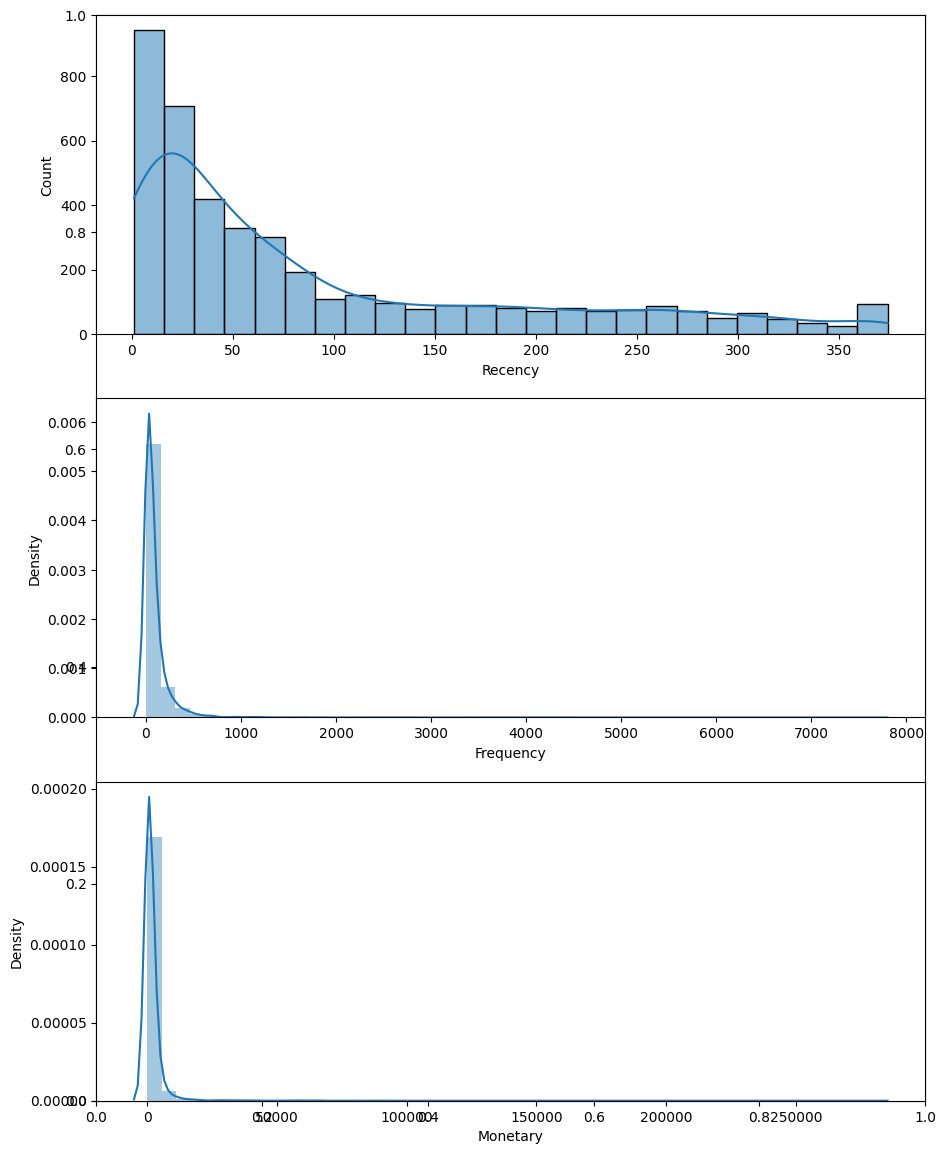

In [37]:
f, ax = plt.subplots(figsize=(10, 12))

plt.subplot(3, 1, 1)
sns.histplot(rfm.Recency, label = 'Recency', kde=True)

plt.subplot(3, 1, 2)
sns.distplot(rfm.Frequency, label = 'Frequency', kde=True)

plt.subplot(3, 1, 3)
sns.distplot(rfm.Monetary, label = 'Monetary', kde=True)

plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()


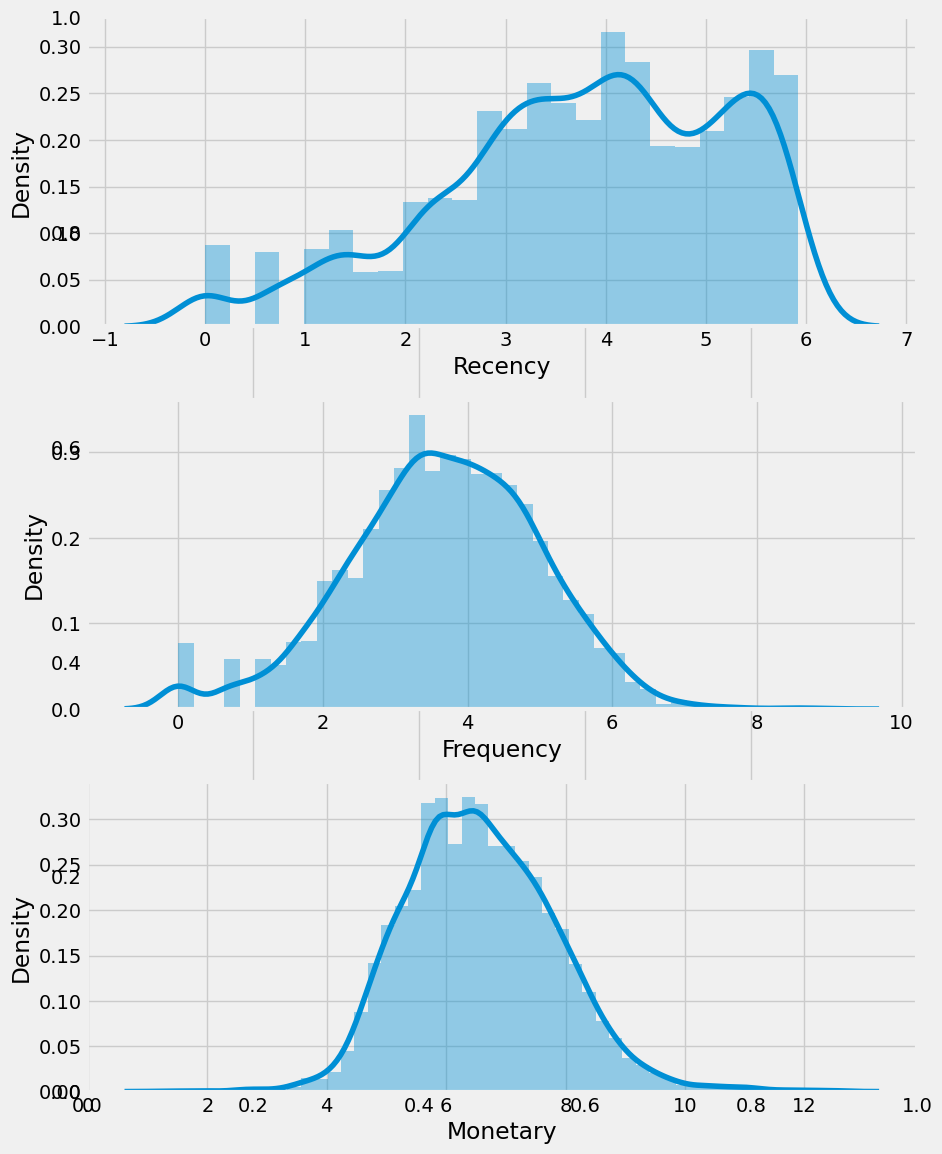

In [38]:
# Apply log transformation to address skewness
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm_log.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_log.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_log.Monetary, label = 'Monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()


In [39]:
# Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)

# Store it separately for clustering
rfm_normalized = scaler.transform(rfm_log)
rfm_normalized = pd.DataFrame(rfm_normalized, columns = ['Recency', 'Frequency', 'Monetary'])
rfm_normalized

,Recency,Frequency,Monetary
0,1.409982,-2.779971,3.700239
1,-2.146578,1.160365,1.413494
2,0.383648,-0.179833,0.719941
3,-0.574961,0.468308,0.702503
4,1.375072,-0.634895,-0.613267
...,...,...,...
4333,1.298970,-1.036198,-1.101529
4334,0.998750,-1.306509,-1.738805
4335,-1.178892,-0.898392,-1.112626
4336,-1.662735,2.202995,0.822191


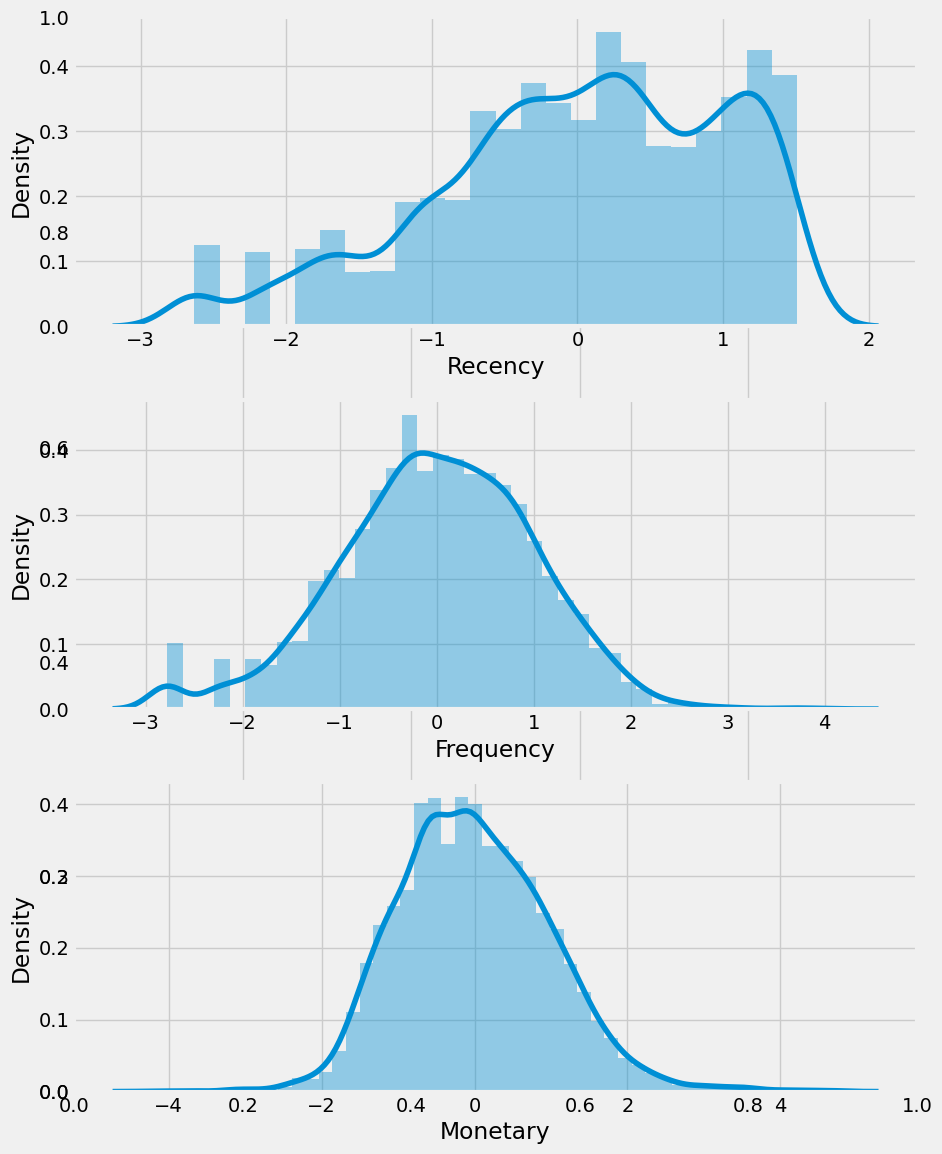

In [40]:
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm_normalized.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_normalized.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_normalized.Monetary, label = 'Monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

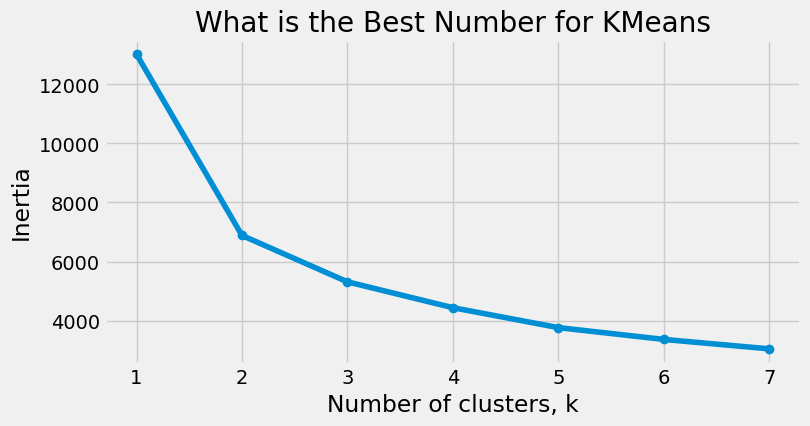

In [41]:
from sklearn.cluster import KMeans

#First : Get the Best KMeans 
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k, random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(8, 4))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.title('What is the Best Number for KMeans')
plt.show()

In [42]:
# clustering
kc = KMeans(n_clusters= 3, random_state=1)
kc.fit(rfm_normalized)

#Create a cluster label column in the original DataFrame
cluster_labels = kc.labels_

#Calculate average RFM values and size for each cluster:
rfm_rfm_k3 = rfm_rfm.assign(K_Cluster = cluster_labels)

#Calculate average RFM values and sizes for each cluster:
rfm_rfm_k3.groupby('K_Cluster').agg({'Recency': 'mean',
                                     'Frequency': 'mean',
                                     'Monetary': ['mean', 'count'],}).round(0)


Recency Frequency Monetary      
             mean      mean     mean count
K_Cluster                                 
0           171.0      15.0    293.0  1523
1            69.0      65.0   1167.0  1859
2            13.0     260.0   6559.0   956

In [43]:
rfm_normalized['CustomerID'] = rfm.index
rfm_normalized['K_Cluster'] = kc.labels_
rfm_normalized

,Recency,Frequency,Monetary,CustomerID,K_Cluster
0,1.409982,-2.779971,3.700239,12346.0,1
1,-2.146578,1.160365,1.413494,12347.0,2
2,0.383648,-0.179833,0.719941,12348.0,1
3,-0.574961,0.468308,0.702503,12349.0,1
4,1.375072,-0.634895,-0.613267,12350.0,0
...,...,...,...,...,...
4333,1.298970,-1.036198,-1.101529,18280.0,0
4334,0.998750,-1.306509,-1.738805,18281.0,0
4335,-1.178892,-0.898392,-1.112626,18282.0,0
4336,-1.662735,2.202995,0.822191,18283.0,2


In [44]:
rfm_normalized = rfm_normalized.merge(rfm.reset_index()[['CustomerID', 'RF_Seg']], on=['CustomerID'])
rfm_normalized

,Recency,Frequency,Monetary,CustomerID,K_Cluster,RF_Seg
0,1.409982,-2.779971,3.700239,12346.0,1,Hibernating
1,-2.146578,1.160365,1.413494,12347.0,2,Champions
2,0.383648,-0.179833,0.719941,12348.0,1,At Risk
3,-0.574961,0.468308,0.702503,12349.0,1,Loyal Customers
4,1.375072,-0.634895,-0.613267,12350.0,0,Hibernating
...,...,...,...,...,...,...
4333,1.298970,-1.036198,-1.101529,18280.0,0,Hibernating
4334,0.998750,-1.306509,-1.738805,18281.0,0,Hibernating
4335,-1.178892,-0.898392,-1.112626,18282.0,0,New Customers
4336,-1.662735,2.202995,0.822191,18283.0,2,Champions


In [51]:
# Melt the data into a long format so RFM values and metric names are stored in 1 column each
rfm_melt = pd.melt(rfm_normalized,
                   id_vars=['CustomerID','RF_Seg','K_Cluster'],
                   value_vars=['Recency', 'Frequency', 'Monetary'], 
                   var_name='Metric',
                   value_name='Value')
rfm_melt.sort_values('CustomerID').head()

,CustomerID,RF_Seg,K_Cluster,Metric,Value
0,12346.0,Hibernating,1,Recency,1.409982
4338,12346.0,Hibernating,1,Frequency,-2.779971
8676,12346.0,Hibernating,1,Monetary,3.700239
1,12347.0,Champions,2,Recency,-2.146578
4339,12347.0,Champions,2,Frequency,1.160365


**Snake Plot**

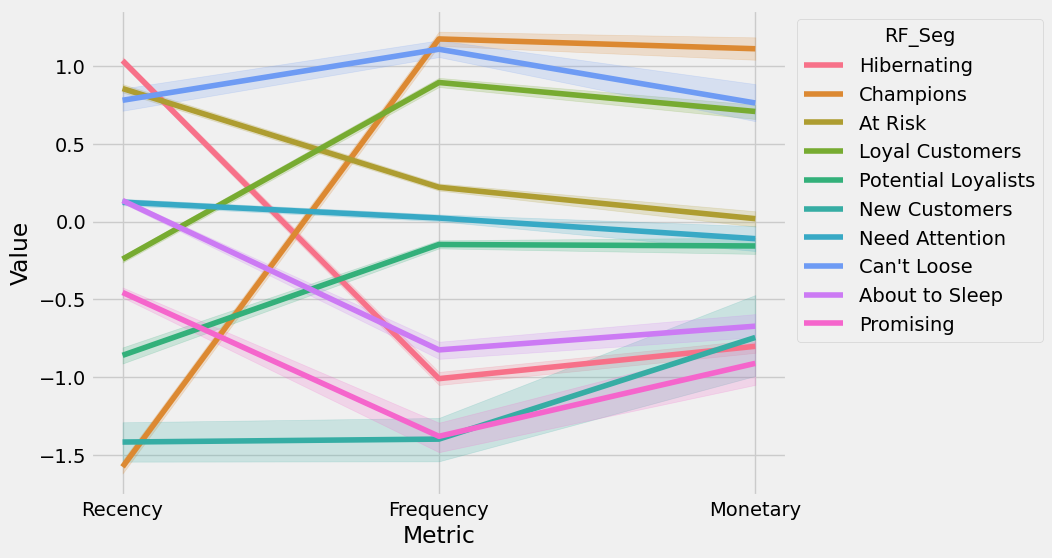

In [52]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x = 'Metric', y = 'Value', hue = 'RF_Seg', data = rfm_melt)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

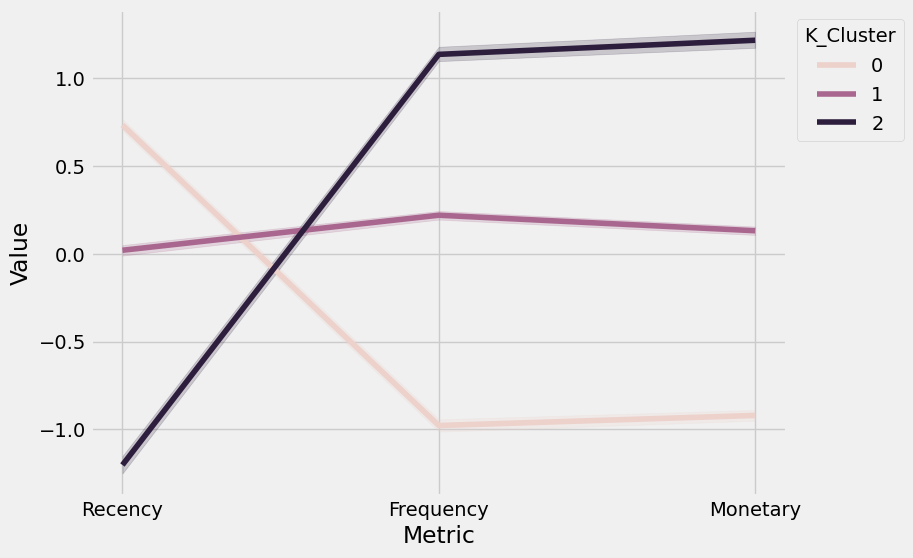

In [47]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Cluster', data = rfm_melt)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

**Relative importance of segment attributes**
- Calculate average values of each cluster
- Calculate average values of population
- Calculate importance score by dividing them and subtracting 1 (ensures 0 is returned when cluster average equals population average)

In [48]:
cluster_avg = rfm_rfm_k3.groupby(['K_Cluster']).mean()
cluster_avg

,Recency,Frequency,Monetary
K_Cluster,,,
0,171.198949,14.906763,293.334551
1,68.942442,65.357719,1167.397393
2,13.099372,259.925732,6558.858389
